In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

train_MNIST = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test_MNIST = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

train_USPS = datasets.USPS('USPS', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test_USPS = datasets.USPS('USPS', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

trainset_MNIST = torch.utils.data.DataLoader(train_MNIST, batch_size=32, shuffle=True)
testset_MNIST = torch.utils.data.DataLoader(test_MNIST, batch_size=32, shuffle=False)

trainset_USPS = torch.utils.data.DataLoader(train_USPS, batch_size=32, shuffle=True)
testset_USPS = torch.utils.data.DataLoader(test_USPS, batch_size=32, shuffle=False)

In [2]:
# transforming the data according to how it is done in the paper. First interpolating so that images are 32x32 and than performing 'random' 28x28 crop

p = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((32,32)),
    transforms.RandomCrop((28, 28)),
    transforms.ToTensor(),
])

In [105]:
print(len(trainset_MNIST))

train_MNIST_transformed = []

for data_MNIST in trainset_MNIST:
    
    data_MNIST_transformed = []
    
    images = data_MNIST[0]
    labels = data_MNIST[1]
    
    print(images.shape)
    
    for i in range(0, len(images)):
        
        image = images[i]
        label = labels[i]
        
        image_transformed = p(image)
        print(image_transformed.shape)
        break
    
    
    
    
    break


1875
torch.Size([32, 1, 28, 28])
torch.Size([1, 28, 28])


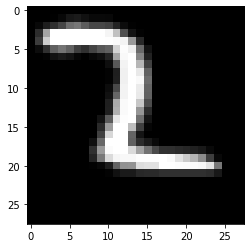

torch.Size([28, 28])
torch.Size([1, 28, 28])


In [57]:
# just plotting a sample to have an idea how the dataset looks

for data_MNIST in trainset_MNIST:
    for image in data_MNIST[0]:
        sample_from_MNIST = p(image)
        break   
    break    
    
plt.imshow(sample_from_MNIST[0].view(28,28), cmap="gray")
plt.show()

print(sample_from_MNIST[0].shape)
print(sample_from_MNIST.shape)

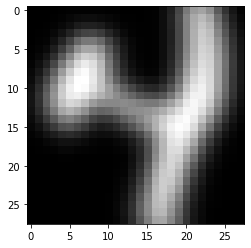

torch.Size([28, 28])
torch.Size([1, 28, 28])


In [60]:
for data_USPS in trainset_USPS:
    for image in data_USPS[0]:
        sample_from_USPS = p(image)
        break
    break
    
plt.imshow(sample_from_USPS[0].view(28, 28), cmap="gray")
plt.show()

print(sample_from_USPS[0].shape)
print(sample_from_USPS.shape)

In [61]:
import torch.nn as nn
import torch.nn.functional as F

In [108]:
class fNet(nn.Module):
    def __init__(self):
        super(fNet, self).__init__()
        
#             # 1st conv layer
#             # input [1 x 28 x 28]
#             # output [64 x 12 x 12]

#             # 2nd conv layer
#             # input [64 x 12 x 12]
#             # output [64 x 4 x 4]

#             # 3rd conv layer
#             # input [64 x 4 x 4]
#             # output [128 x 1 x 1]

        self.conv1 = nn.Conv2d(1, 64, 5) 
        self.conv2 = nn.Conv2d(64, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)
        
#         self.fc1 = nn.Linear(128 * 1 * 1, 512)

        self.pool = nn.MaxPool2d(2, 2, padding=1)
         
    def forward(self, x):
        output = self.pool(F.relu(self.conv1(x)))
        output = self.pool(F.relu(self.conv2(output)))
        output = F.relu(self.conv3(output))
        output = output.view(-1, 128 * 1 * 1)
#         output = self.fc1(output)
        return output

In [109]:
# just trying to pass some data to see if it works

fnet = fNet()
print(fnet)

output = fnet(data_MNIST[0])
print(output.shape)

fNet(
  (conv1): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
)
torch.Size([32, 128])


In [71]:
class gNet(nn.Module):
    def __init__(self):
        super(gNet, self).__init__()
                
#             # 1st conv layer
#             # input [1 x 28 x 28]
#             # output [64 x 12 x 12]

#             # 2nd conv layer
#             # input [64 x 12 x 12]
#             # output [64 x 4 x 4]

#             # 3rd conv layer
#             # input [64 x 4 x 4]
#             # output [128 x 4 x 4]

        self.conv1 = nn.Conv2d(1, 64, 5) 
        self.conv2 = nn.Conv2d(64, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)
        
        self.fc1 = nn.Linear(128 * 1 * 1, 512)

        self.pool = nn.MaxPool2d(2, 2, padding=1)
         
    def forward(self, x):
        output = self.pool(F.relu(self.conv1(x)))
        output = self.pool(F.relu(self.conv2(output)))
        output = F.relu(self.conv3(output))
        output = output.view(-1, 128 * 1 *1)
        output = self.fc1(output)
        return output

In [110]:
# again trying to pass some data to check if the gNet works

gnet = gNet()
print(gnet)
print(data_USPS[0].shape)
output_g = gnet(data_USPS[0])
print(output_g)

gNet(
  (conv1): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=128, out_features=512, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
)
torch.Size([32, 1, 16, 16])


RuntimeError: Calculated padded input size per channel: (2 x 2). Kernel size: (5 x 5). Kernel size can't be greater than actual input size

In [67]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.restored = True

        
        self.layer = nn.Sequential(
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 2),
            nn.Softmax(dim=1)
        )
        
    def forward(self, x):
        
        output = self.layer(x)
        return output

In [68]:
disc = Discriminator()
print(disc)

disc_output = disc(output)
print(disc_output)

Discriminator(
  (layer): Sequential(
    (0): Linear(in_features=512, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=2, bias=True)
    (5): Softmax(dim=1)
  )
)
tensor([[0.4912, 0.5088],
        [0.4911, 0.5089],
        [0.4917, 0.5083],
        [0.4909, 0.5091],
        [0.4909, 0.5091],
        [0.4917, 0.5083],
        [0.4912, 0.5088],
        [0.4913, 0.5087],
        [0.4911, 0.5089],
        [0.4920, 0.5080],
        [0.4915, 0.5085],
        [0.4907, 0.5093],
        [0.4912, 0.5088],
        [0.4915, 0.5085],
        [0.4911, 0.5089],
        [0.4911, 0.5089],
        [0.4911, 0.5089],
        [0.4914, 0.5086],
        [0.4911, 0.5089],
        [0.4912, 0.5088],
        [0.4908, 0.5092],
        [0.4911, 0.5089],
        [0.4918, 0.5082],
        [0.4911, 0.5089],
        [0.4914, 0.5086],
        [0.4914, 0.5086],
        [0.4916, 0.5084],
        [0

In [69]:
# try stuff cell

t = torch.tensor([[1,2],[2,1]])
print(t.shape)
t = torch.flatten(t)
print(t.shape)
print(t)

torch.Size([2, 2])
torch.Size([4])
tensor([1, 2, 2, 1])
